In [240]:
import numpy as np
import scipy as scipy
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [241]:
#read data with pandas library
data = pd.read_excel('dataset.xlsx')

In [242]:
data.head(3) #First 3 samples of the our dataset:

,Name,NOB,V,SH,CS,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
0,Alarmio-master,22,17,3,169,1.4,1.0,0.364583,2.000000,5.802083,27.260802,3.567901,3.427686,4.367769,21.252630,5.464506,1.968750
1,AndroidAsyncHTTP-master,11,20,14,494,4.7,6.0,0.474684,2.208861,24.006329,25.996479,10.336268,3.172492,2.727170,17.430380,5.158451,2.177215
2,android-pdf-viewer-master,2,1,0,4,0.0,12.2,0.000000,0.500000,1.833333,18.280000,4.560000,1.727273,3.454545,9.666667,2.560000,1.666667


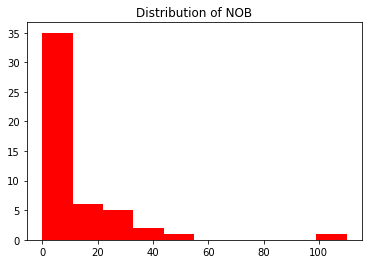

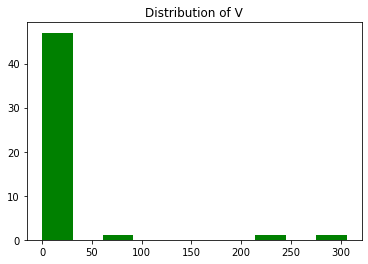

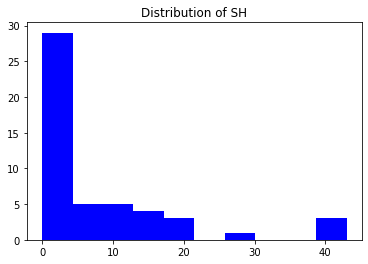

In [243]:
#show the distribution of 3 metrics
def plotHist(columnName,colorName):
    plt.figure()
    plt.hist(data[columnName], color = colorName)
    plt.title("Distribution of " + columnName)
    
plotHist("NOB","red")  
plotHist("V", "green")
plotHist("SH", "blue")



In [244]:
#Min max scaler for all data
#data.columns
X_Data = data[['NOB', 'V', 'SH', 'CS', 'CDR', 'TD', 'NOC', 'CBO', 'RFC', 'LOC',
       'CLOC', 'FanIn', 'FanOut', 'LCOM', 'WMC', 'DIT']]

X_Data = X_Data.apply(lambda x: (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0)))

print(X_Data)

         NOB         V        SH      CS       CDR        TD       NOC  \
0   0.200000  0.055556  0.069767  0.0845  0.070707  0.081967  0.450368   
1   0.100000  0.065359  0.325581  0.2470  0.237374  0.491803  0.586374   
2   0.018182  0.003268  0.000000  0.0020  0.000000  1.000000  0.000000   
3   0.009091  0.003268  0.023256  0.0030  0.000000  0.172131  0.102941   
4   0.000000  0.019608  0.000000  0.1265  0.171717  0.344262  0.044649   
5   0.036364  0.058824  0.162791  0.0500  0.191919  0.254098  0.247059   
6   0.136364  0.009804  0.000000  0.0775  0.151515  0.081967  0.298861   
7   0.009091  0.000000  0.000000  0.0345  0.050505  0.016393  0.000000   
8   0.309091  1.000000  1.000000  1.0000  0.510101  0.139344  0.618665   
9   0.000000  0.039216  0.186047  0.0670  0.000000  0.245902  0.315394   
10  0.000000  0.000000  0.000000  0.0015  0.000000  0.008197  0.000000   
11  0.000000  0.000000  0.000000  0.0120  0.000000  0.024590  0.000000   
12  0.000000  0.000000  0.000000  0.01

# Part1 (Statistical Correlation Analysis)

In [245]:
#Show the correlation matrix of all metrics
corr_Matrix = X_Data.corr("spearman")
print(corr_Matrix)

             NOB         V        SH        CS       CDR        TD       NOC  \
NOB     1.000000  0.694733  0.587592  0.691274  0.373251  0.133383  0.407858   
V       0.694733  1.000000  0.629663  0.624194  0.280358  0.296757  0.409002   
SH      0.587592  0.629663  1.000000  0.618509  0.384657 -0.026546  0.512876   
CS      0.691274  0.624194  0.618509  1.000000  0.548113  0.194611  0.402859   
CDR     0.373251  0.280358  0.384657  0.548113  1.000000  0.013400  0.192707   
TD      0.133383  0.296757 -0.026546  0.194611  0.013400  1.000000 -0.179659   
NOC     0.407858  0.409002  0.512876  0.402859  0.192707 -0.179659  1.000000   
CBO     0.353351  0.426221  0.391886  0.577439  0.212007  0.013652  0.667344   
RFC     0.447180  0.345986  0.425499  0.492868  0.240992 -0.126364  0.584086   
LOC     0.349883  0.243636  0.129174  0.440458  0.328527 -0.031098 -0.120165   
CLOC    0.369028  0.208594  0.204069  0.260596  0.171773  0.114297  0.297347   
FanIn   0.458483  0.468565  0.278723  0.

In [246]:
#P values of Spearman Correlation Table
#scipy.stats.spearmanr(data)
corr, p_val = scipy.stats.spearmanr(corr_Matrix)
np.around(p_val, 4)

array([[0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.100e-03, 7.617e-01,
        1.290e-02, 1.180e-02, 3.500e-02, 2.790e-01, 8.600e-03, 2.260e-01,
        6.963e-01, 5.717e-01, 1.878e-01, 3.990e-01],
       [0.000e+00, 0.000e+00, 1.000e-04, 1.000e-04, 2.930e-02, 8.118e-01,
        9.000e-03, 3.200e-03, 1.649e-01, 5.569e-01, 8.250e-02, 1.959e-01,
        5.944e-01, 4.443e-01, 4.117e-01, 3.388e-01],
       [0.000e+00, 1.000e-04, 0.000e+00, 0.000e+00, 5.500e-03, 2.541e-01,
        1.000e-04, 4.700e-03, 2.440e-02, 9.311e-01, 6.970e-02, 6.485e-01,
        5.569e-01, 3.218e-01, 7.370e-01, 6.970e-02],
       [0.000e+00, 1.000e-04, 0.000e+00, 0.000e+00, 1.000e-04, 6.723e-01,
        1.790e-02, 1.340e-02, 1.130e-01, 1.278e-01, 1.102e-01, 1.723e-01,
        4.645e-01, 3.804e-01, 1.405e-01, 4.246e-01],
       [1.100e-03, 2.930e-02, 5.500e-03, 1.000e-04, 0.000e+00, 4.311e-01,
        3.388e-01, 2.493e-01, 4.311e-01, 1.590e-02, 3.218e-01, 3.218e-01,
        2.688e-01, 9.440e-02, 1.075e-01, 6.963e-

<AxesSubplot:title={'center':'Heatmap of Correlation Matrix'}>

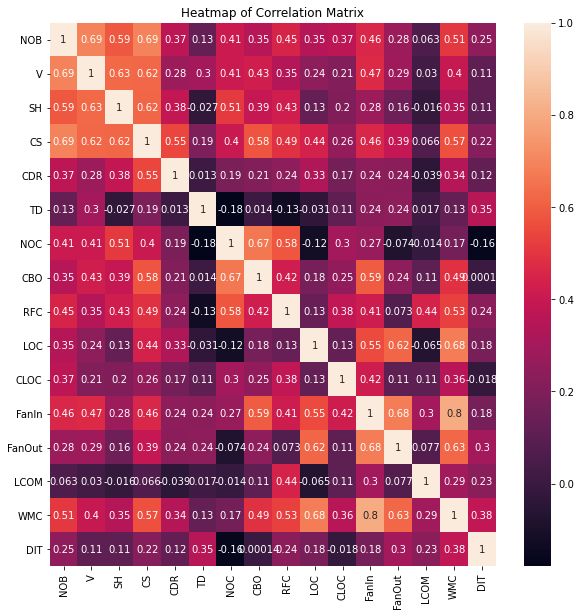

In [247]:
#If you want to see heatmap of the correlation matrix, you can launch code below:
plt.subplots(figsize=(10,10))
plt.title("Heatmap of Correlation Matrix")
sns.heatmap(corr_Matrix, annot=True)

In [248]:
#Correlation between External Metrics & TD
External = X_Data[['NOB', 'V', 'SH', 'CS', 'CDR', 'TD']]
External.corr()

,NOB,V,SH,CS,CDR,TD
NOB,1.000000,0.358014,0.411136,0.632781,0.045188,-0.115792
V,0.358014,1.000000,0.581123,0.663286,0.175517,-0.045441
SH,0.411136,0.581123,1.000000,0.718279,0.455000,-0.043494
CS,0.632781,0.663286,0.718279,1.000000,0.260119,-0.015236
CDR,0.045188,0.175517,0.455000,0.260119,1.000000,-0.024371
TD,-0.115792,-0.045441,-0.043494,-0.015236,-0.024371,1.000000


In [249]:
#Correlation between Internal Metrics & TD
Internal = X_Data[['CDR', 'TD', 'NOC', 'CBO', 'RFC', 'LOC', 'CLOC', 'FanIn', 'FanOut', 'LCOM', 'WMC', 'DIT']]
Internal.corr()

,CDR,TD,NOC,CBO,RFC,LOC,CLOC,FanIn,FanOut,LCOM,WMC,DIT
CDR,1.000000,-0.024371,0.160786,0.171285,0.059865,0.285650,0.071360,0.169463,0.243964,-0.145200,0.203131,0.079976
TD,-0.024371,1.000000,-0.235805,-0.116862,-0.016734,-0.128883,0.059036,0.043951,0.142802,-0.018478,-0.009809,0.314440
NOC,0.160786,-0.235805,1.000000,0.544310,0.513995,-0.184217,0.263939,0.159821,-0.032079,-0.146831,0.082244,0.030046
CBO,0.171285,-0.116862,0.544310,1.000000,0.358699,0.104966,0.320180,0.634931,0.378097,0.042853,0.490495,0.235902
RFC,0.059865,-0.016734,0.513995,0.358699,1.000000,0.030089,0.367023,0.277753,0.108836,0.284149,0.353603,0.417998
LOC,0.285650,-0.128883,-0.184217,0.104966,0.030089,1.000000,0.287360,0.403515,0.297170,-0.144072,0.602624,-0.062443
CLOC,0.071360,0.059036,0.263939,0.320180,0.367023,0.287360,1.000000,0.581949,0.246701,0.040736,0.562943,0.065859
FanIn,0.169463,0.043951,0.159821,0.634931,0.277753,0.403515,0.581949,1.000000,0.715452,0.231137,0.867661,0.351418
FanOut,0.243964,0.142802,-0.032079,0.378097,0.108836,0.297170,0.246701,0.715452,1.000000,0.243898,0.633420,0.567333
LCOM,-0.145200,-0.018478,-0.146831,0.042853,0.284149,-0.144072,0.040736,0.231137,0.243898,1.000000,0.248885,0.443861


# Part2 (ML Modelling)



We are going to use 5 different ML Regression Models to predict Technical Debt values:

>Linear Regression

>Support Vector Regression

>Decision Tree Regression

>Random Forest Tree Regression

>Multi-layer Perceptron

70% of our data will be used as training set and 30% as test set. Training and test sets will be randomly. The “random_state” variable will have a fixed value so that all models get the same random data. In this way, we will be able to evaluate the success rate of the different models objectively.


In [250]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import NearestCentroid
import pandas as pd

random_state_fixed=53

#This function plots graphs to improve visual confirmation
def plotGraph(y_test,y_pred,regressorName, title, reg_type):
    #Plot the Scatter Graph to see results better
    
    plt.figure()
    plt.title("Estimation of " + title + " by " + reg_type)
    plt.scatter(y_test, y_test,  color='red', label = "Original Value")
    plt.scatter(y_test, y_pred, color='blue', label = "Predicted Value")
    plt.legend()
    print('Mean Squared Error For',title,':', mean_squared_error(y_test, y_pred), "by", reg_type)
    print('R-squared Value for',title,':', r2_score(y_test, y_pred), " by ", reg_type)

#Linear Regressor is one of the best choice for the data that is correlated linearly:

def linearRegression(x_train,y_train,x_test,y_test, title):
    # Create the regressor: reg_all
    reg_all = LinearRegression()

    reg_all.fit(x_train, y_train.ravel())
    y_pred = reg_all.predict(x_test)
    
    
    
    plotGraph(y_test, y_pred, reg_all, title, "Linear Regression")
    

#SVR is also one of the most common regressor that used for regression predictions
def svrRegression(X_train,y_train,X_test,y_test, title):
    linear = SVR(kernel = 'linear')
    linear.fit(x_train, y_train.ravel())
    y_pred_lin = linear.predict(x_test)
    plotGraph(y_test, y_pred_lin, linear, title, "SVR Regression Linear Kernel")
    
    rbf = SVR(kernel = 'rbf')
    rbf.fit(x_train, y_train.ravel())
    y_pred_rbf = rbf.predict(x_test)
    plotGraph(y_test, y_pred_rbf, rbf, title, "SVR Regression RBF Kernel")
    


def decisionTreeRegression(x_train,y_train,x_test,y_test, title):
    regressor = DecisionTreeRegressor(random_state = random_state_fixed)
    regressor.fit(x_train, y_train.ravel())
    y_pred = regressor.predict(x_test)
    
    plotGraph(y_test, y_pred, regressor, title, "Decision Tree Regression")


def randomDecTreeRegression(x_train,y_train,x_test,y_test, title):
    regressor = RandomForestRegressor(random_state = random_state_fixed) 
    regressor.fit(x_train, y_train.ravel())
    y_pred = regressor.predict(x_test)
    
    plotGraph(y_test, y_pred, regressor, title, "Random Forest Regression")


#Multi-layer Perceptron regressor: 'This model optimizes the squared-loss using LBFGS or stochastic gradient descent.'
def mlpRegressor(x_train,y_train,x_test,y_test, title):
    
    regressor = MLPRegressor(random_state = random_state_fixed)
    regressor.fit(x_train, y_train.ravel())
    y_pred = regressor.predict(x_test)
    
    plotGraph(y_test, y_pred, regressor, title, "Multi-Layer Perceptron Regression")
    

In this step (step 3), we will try to estimate Technical Debt using internal metrics.

In [251]:
#split data into train and test data
random_state_fixed=53
y_td = data[['TD']].values
y_cdr = data[['CDR']].values
x = data.drop(['Name','NOB', 'V', 'SH', 'CS', 'CDR', 'TD'],  axis=1).values

x_train,x_test,y_td_train,y_td_test=train_test_split(x,y_td,test_size=0.3, random_state=random_state_fixed)
x_train,x_test,y_cdr_train,y_cdr_test=train_test_split(x,y_cdr,test_size=0.3, random_state=random_state_fixed)

#print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

Mean Squared Error For TD : 10.457344391419559 by Linear Regression
R-squared Value for TD : -0.17296753046920688  by  Linear Regression
Mean Squared Error For CDR : 31.23898105568215 by Linear Regression
R-squared Value for CDR : -0.2535393690060328  by  Linear Regression


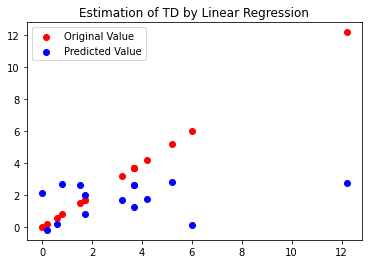

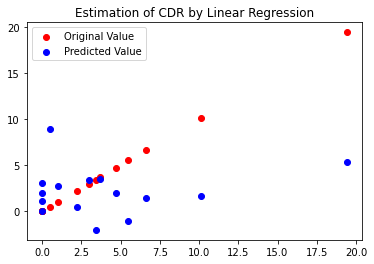

In [252]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
linearRegression(x_train,y_td_train,x_test,y_td_test, "TD")
linearRegression(x_train,y_cdr_train,x_test,y_cdr_test, "CDR")

Mean Squared Error For TD : 12.089039297321015 by SVR Regression Linear Kernel
R-squared Value for TD : -0.35598963174233944  by  SVR Regression Linear Kernel
Mean Squared Error For TD : 12.307656572325266 by SVR Regression RBF Kernel
R-squared Value for TD : -0.38051124598601405  by  SVR Regression RBF Kernel
Mean Squared Error For CDR : 35.90941253832896 by SVR Regression Linear Kernel
R-squared Value for CDR : -0.4409516832331666  by  SVR Regression Linear Kernel
Mean Squared Error For CDR : 33.903998001268796 by SVR Regression RBF Kernel
R-squared Value for CDR : -0.36047959392586626  by  SVR Regression RBF Kernel


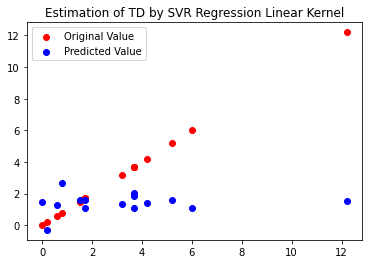

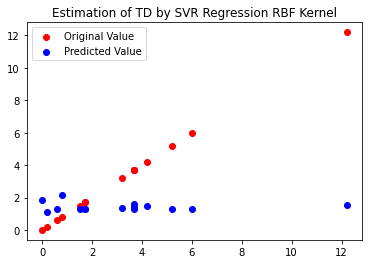

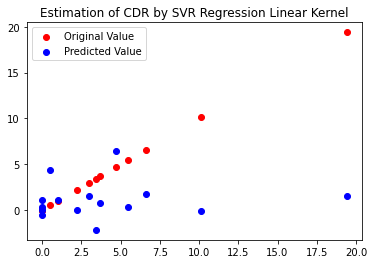

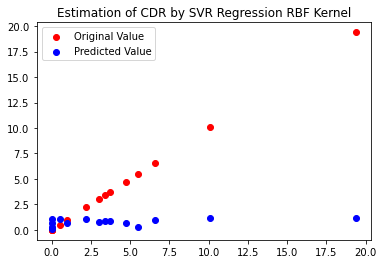

In [253]:
#Model for SVR Regression (show also R-Squared Value and Root Mean Squared Error )
svrRegression(x_train,y_td_train,x_test,y_td_test, "TD")
svrRegression(x_train,y_cdr_train,x_test,y_cdr_test, "CDR")

Mean Squared Error For TD : 13.510666666666664 by Decision Tree Regression
R-squared Value for TD : -0.5154491161251082  by  Decision Tree Regression
Mean Squared Error For CDR : 27.94866666666666 by Decision Tree Regression
R-squared Value for CDR : -0.12150757783825639  by  Decision Tree Regression


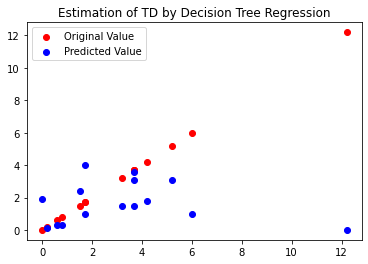

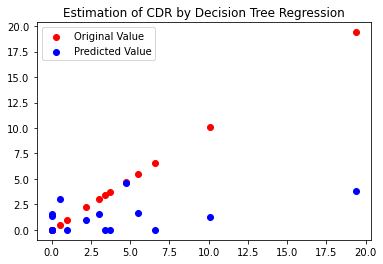

In [254]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
decisionTreeRegression(x_train,y_td_train,x_test,y_td_test, "TD")
decisionTreeRegression(x_train,y_cdr_train,x_test,y_cdr_test, "CDR")

Mean Squared Error For TD : 10.519632733333331 by Random Forest Regression
R-squared Value for TD : -0.17995421847114046  by  Random Forest Regression
Mean Squared Error For CDR : 26.079362866666663 by Random Forest Regression
R-squared Value for CDR : -0.0464972597438269  by  Random Forest Regression


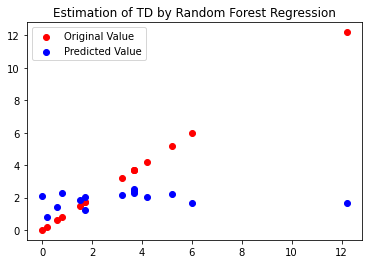

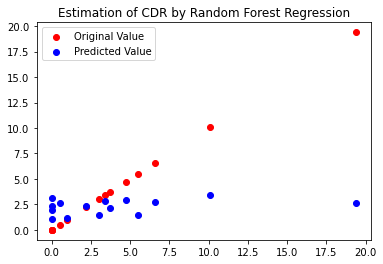

In [255]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
randomDecTreeRegression(x_train,y_td_train,x_test,y_td_test, "TD")
randomDecTreeRegression(x_train,y_cdr_train,x_test,y_cdr_test, "CDR")

Mean Squared Error For TD : 10.959911753704514 by Multi-Layer Perceptron Regression
R-squared Value for TD : -0.22933893565286878  by  Multi-Layer Perceptron Regression
Mean Squared Error For CDR : 25.632382679626904 by Multi-Layer Perceptron Regression
R-squared Value for CDR : -0.02856110297157821  by  Multi-Layer Perceptron Regression


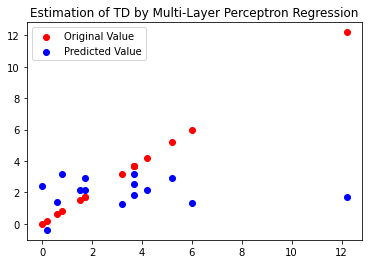

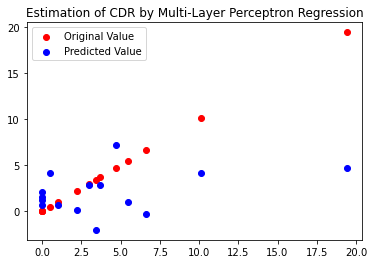

In [256]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )
mlpRegressor(x_train,y_td_train,x_test,y_td_test, "TD")
mlpRegressor(x_train,y_cdr_train,x_test,y_cdr_test, "CDR")

In this step (step 4), we will try to estimate Technical Debt using external metrics.

In [257]:
#split data into train and test data
random_state_fixed=53
y_td = data[['TD']].values
y_cdr = data[['CDR']].values
x = data.drop(['Name','NOC', 'CBO', 'RFC', 'LOC', 'CLOC', 'FanIn', 'FanOut', 'LCOM', 'WMC', 'DIT', 'CDR', 'TD'],  axis=1).values

x_train,x_test,y_td_train,y_td_test=train_test_split(x,y_td,test_size=0.3, random_state=random_state_fixed)
x_train,x_test,y_cdr_train,y_cdr_test=train_test_split(x,y_cdr,test_size=0.3, random_state=random_state_fixed)



Mean Squared Error For TD : 12.777060863079345 by Linear Regression
R-squared Value for TD : -0.43316285342176375  by  Linear Regression
Mean Squared Error For CDR : 32.366258183212196 by Linear Regression
R-squared Value for CDR : -0.2987740793386193  by  Linear Regression


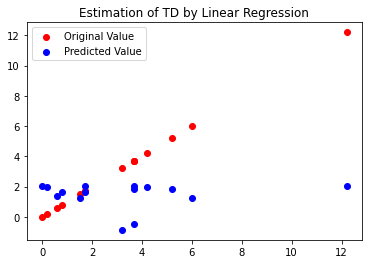

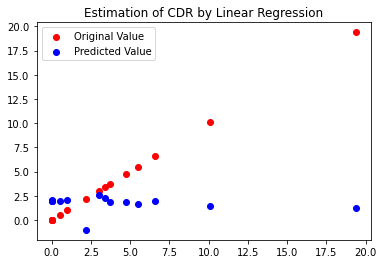

In [258]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
linearRegression(x_train,y_td_train,x_test,y_td_test, "TD")
linearRegression(x_train,y_cdr_train,x_test,y_cdr_test, "CDR")

Mean Squared Error For TD : 13.921870083984745 by SVR Regression Linear Kernel
R-squared Value for TD : -0.5615725140814618  by  SVR Regression Linear Kernel
Mean Squared Error For TD : 12.011633488318498 by SVR Regression RBF Kernel
R-squared Value for TD : -0.34730726485919927  by  SVR Regression RBF Kernel
Mean Squared Error For CDR : 37.69510811401931 by SVR Regression Linear Kernel
R-squared Value for CDR : -0.5126070199164545  by  SVR Regression Linear Kernel
Mean Squared Error For CDR : 32.70995338536125 by SVR Regression RBF Kernel
R-squared Value for CDR : -0.3125656772804468  by  SVR Regression RBF Kernel


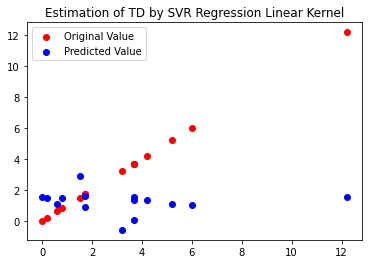

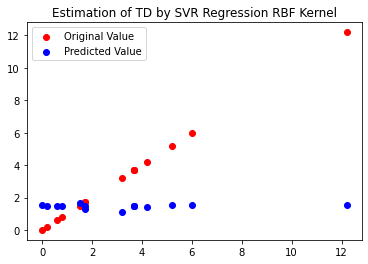

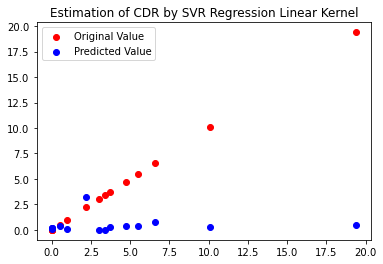

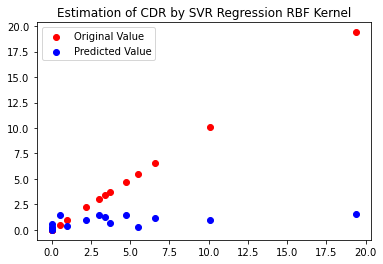

In [259]:
#Model for SVR (show also R-Squared Value and Root Mean Squared Error )
svrRegression(x_train,y_td_train,x_test,y_td_test, "TD")
svrRegression(x_train,y_cdr_train,x_test,y_cdr_test, "CDR")

Mean Squared Error For TD : 15.551333333333332 by Decision Tree Regression
R-squared Value for TD : -0.7443442974366132  by  Decision Tree Regression
Mean Squared Error For CDR : 38.285333333333334 by Decision Tree Regression
R-squared Value for CDR : -0.5362912286834292  by  Decision Tree Regression


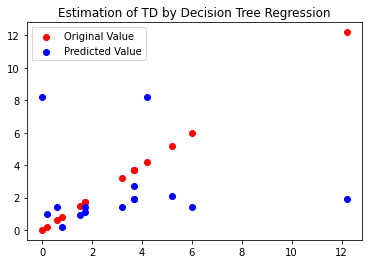

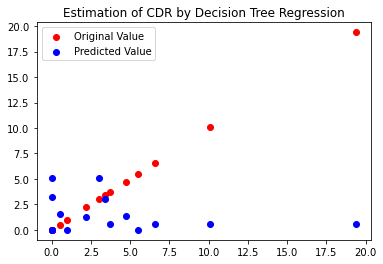

In [260]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
decisionTreeRegression(x_train,y_td_train,x_test,y_td_test, "TD")
decisionTreeRegression(x_train,y_cdr_train,x_test,y_cdr_test, "CDR")

Mean Squared Error For TD : 10.342445933333336 by Random Forest Regression
R-squared Value for TD : -0.16007973069982184  by  Random Forest Regression
Mean Squared Error For CDR : 31.637928845333345 by Random Forest Regression
R-squared Value for CDR : -0.2695481101238786  by  Random Forest Regression


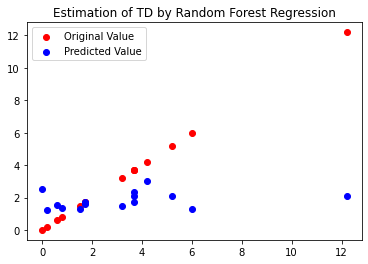

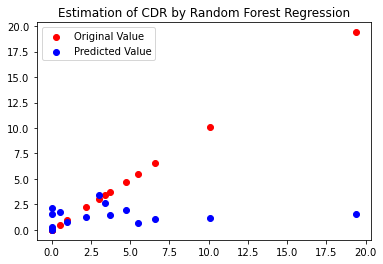

In [261]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
randomDecTreeRegression(x_train,y_td_train,x_test,y_td_test, "TD")
randomDecTreeRegression(x_train,y_cdr_train,x_test,y_cdr_test, "CDR")

Mean Squared Error For TD : 555.180503473169 by Multi-Layer Perceptron Regression
R-squared Value for TD : -61.272856257646296  by  Multi-Layer Perceptron Regression
Mean Squared Error For CDR : 453.751709728451 by Multi-Layer Perceptron Regression
R-squared Value for CDR : -17.207880432609407  by  Multi-Layer Perceptron Regression


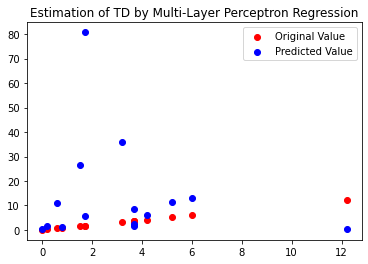

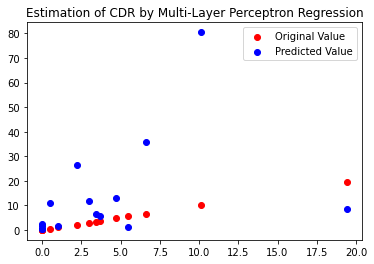

In [262]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )
mlpRegressor(x_train,y_td_train,x_test,y_td_test, "TD")
mlpRegressor(x_train,y_cdr_train,x_test,y_cdr_test, "CDR")

In this step 5, we will try to estimate Technical Debt using all internal and external metrics.

In [263]:
#split data into train and test data
random_state_fixed=53
y_td = data[['TD']].values
y_cdr = data[['CDR']].values
x = data.drop(['Name','CDR','TD'],  axis=1).values

x_train,x_test,y_td_train,y_td_test=train_test_split(x,y_td,test_size=0.3, random_state=random_state_fixed)
x_train,x_test,y_cdr_train,y_cdr_test=train_test_split(x,y_cdr,test_size=0.3, random_state=random_state_fixed)

Mean Squared Error For TD : 8.947680621680233 by Linear Regression
R-squared Value for TD : -0.0036332791000988074  by  Linear Regression
Mean Squared Error For CDR : 74.98968080985894 by Linear Regression
R-squared Value for CDR : -2.0091415912957884  by  Linear Regression


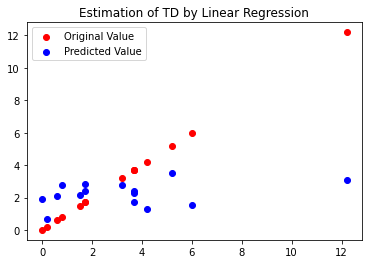

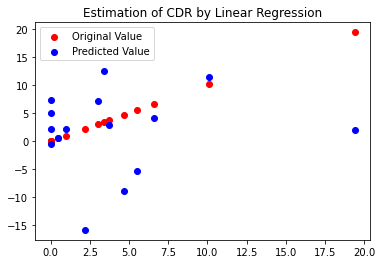

In [264]:
#Model for Linear Regression (show also R-Squared Value and Root Mean Squared Error )
linearRegression(x_train,y_td_train,x_test,y_td_test, "TD")
linearRegression(x_train,y_cdr_train,x_test,y_cdr_test, "CDR")

Mean Squared Error For TD : 11.826876312167506 by SVR Regression Linear Kernel
R-squared Value for TD : -0.32658363173259874  by  SVR Regression Linear Kernel
Mean Squared Error For TD : 12.02933909259897 by SVR Regression RBF Kernel
R-squared Value for TD : -0.3492932469738719  by  SVR Regression RBF Kernel
Mean Squared Error For CDR : 29.538539284385347 by SVR Regression Linear Kernel
R-squared Value for CDR : -0.18530504659892655  by  SVR Regression Linear Kernel
Mean Squared Error For CDR : 32.76694766644078 by SVR Regression RBF Kernel
R-squared Value for CDR : -0.3148527101069667  by  SVR Regression RBF Kernel


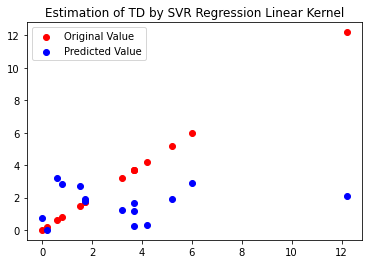

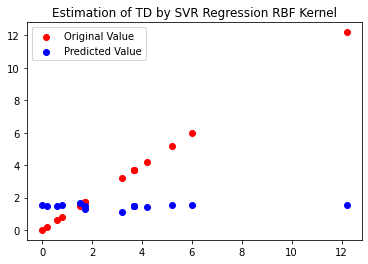

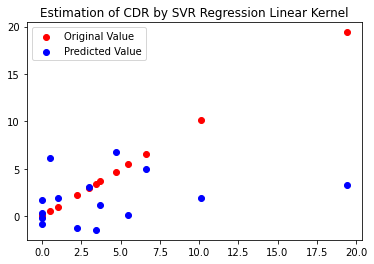

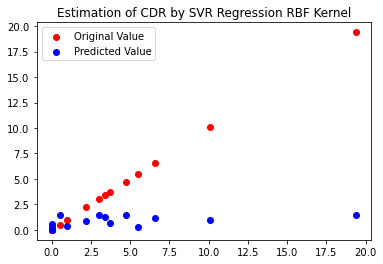

In [265]:
#Model for SVR (show also R-Squared Value and Root Mean Squared Error )
svrRegression(x_train,y_td_train,x_test,y_td_test, "TD")
svrRegression(x_train,y_cdr_train,x_test,y_cdr_test, "CDR")

Mean Squared Error For TD : 11.205333333333332 by Decision Tree Regression
R-squared Value for TD : -0.25686710469904384  by  Decision Tree Regression
Mean Squared Error For CDR : 27.74266666666666 by Decision Tree Regression
R-squared Value for CDR : -0.11324133158793992  by  Decision Tree Regression


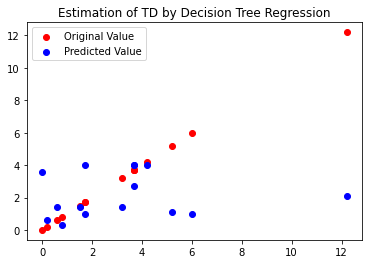

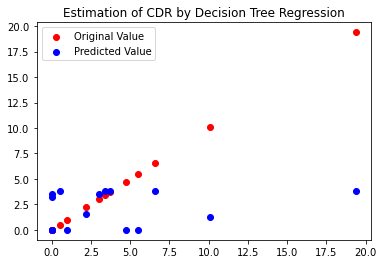

In [266]:
#Model for Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
decisionTreeRegression(x_train,y_td_train,x_test,y_td_test, "TD")
decisionTreeRegression(x_train,y_cdr_train,x_test,y_cdr_test, "CDR")

Mean Squared Error For TD : 8.34486586666667 by Random Forest Regression
R-squared Value for TD : 0.06398256179147899  by  Random Forest Regression
Mean Squared Error For CDR : 25.30861033333333 by Random Forest Regression
R-squared Value for CDR : -0.01556895761475574  by  Random Forest Regression


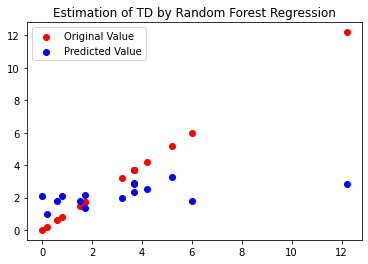

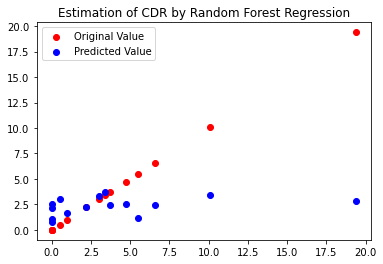

In [267]:
#Model for Random Decision Tree Regression (show also R-Squared Value and Root Mean Squared Error )
randomDecTreeRegression(x_train,y_td_train,x_test,y_td_test, "TD")
randomDecTreeRegression(x_train,y_cdr_train,x_test,y_cdr_test, "CDR")

Mean Squared Error For TD : 16.131516958399697 by Multi-Layer Perceptron Regression
R-squared Value for TD : -0.8094216754438974  by  Multi-Layer Perceptron Regression
Mean Squared Error For CDR : 56.680477868000935 by Multi-Layer Perceptron Regression
R-squared Value for CDR : -1.2744407167112315  by  Multi-Layer Perceptron Regression


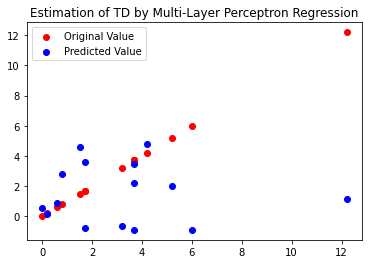

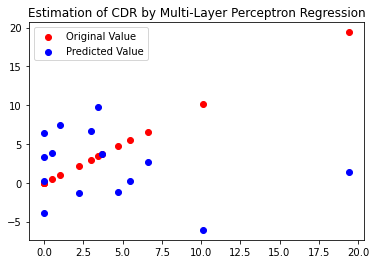

In [268]:
#Model for Multi-layer Perceptron Regressor (show also R-Squared Value and Root Mean Squared Error )
mlpRegressor(x_train,y_td_train,x_test,y_td_test, "TD")
mlpRegressor(x_train,y_cdr_train,x_test,y_cdr_test, "CDR")